## Course: DSC550
## Assignment: 3.2 Assignment
## Name: Laura Hoffmann
## Date: 6/26/2021

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:
Box plots, Scatter plots, Regression Model

In [1]:
# Import Libraries
    # Data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

    # Model Building
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read in the Dodgers Data
data = pd.read_csv("dodgers.csv")

In [3]:
# Take a Look at the Data
data.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [4]:
# Checking for Missing Values
data.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

## Understanding the Data
### Data Summaries

In [5]:
# Summary of Entire Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [6]:
# Summary Stats for Numerical Values
data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [7]:
# Summary Stats for Categorical Values
data.describe(include=['object'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Saturday,Padres,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


### Visuals

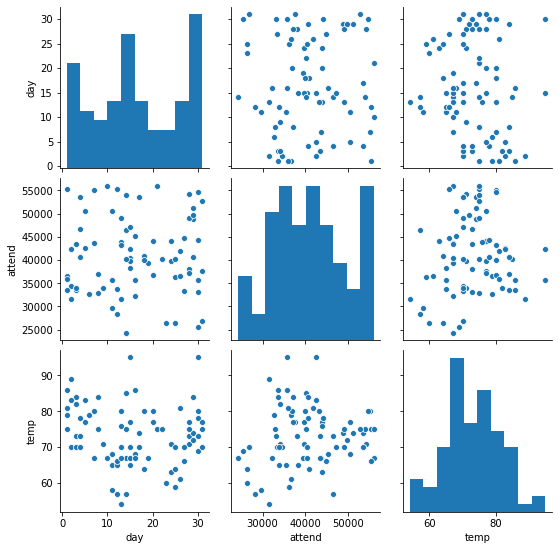

In [8]:
sns.pairplot(data)

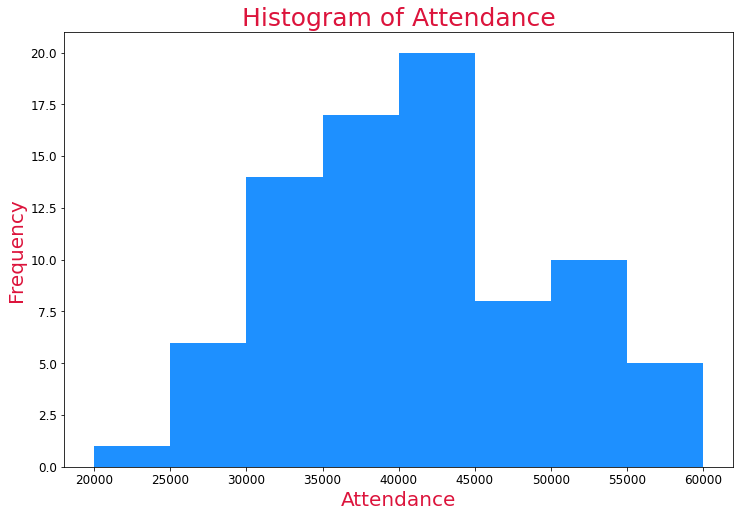

In [9]:
# Histogram to Show Distribution of Attendance
plt.rcParams['figure.figsize'] = [12, 8]
bins = [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]
plt.hist(data.attend, bins=bins, color='dodgerblue')
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of Attendance", fontsize=25, color='crimson')
plt.xlabel("Attendance", fontsize=20, color='crimson')
plt.ylabel("Frequency", fontsize=20, color='crimson')
plt.show()

Text(0, 0.5, 'Attendance')

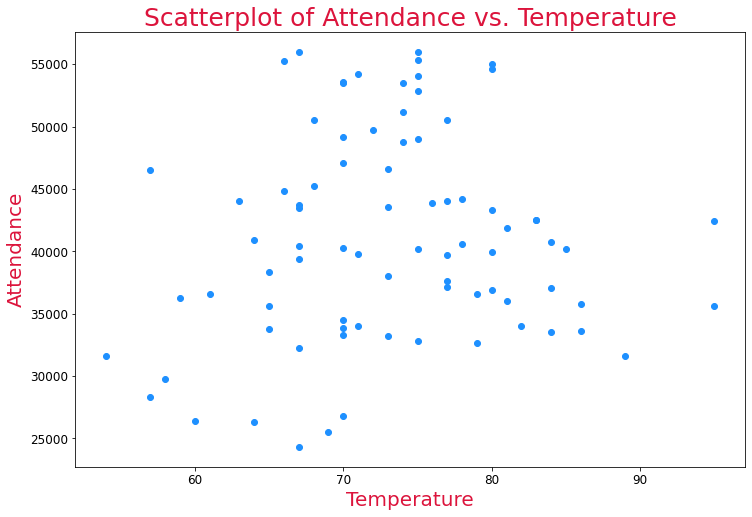

In [10]:
# Scatterplot for Temperature vs. Attendance
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(data.temp, data.attend, color='dodgerblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Attendance vs. Temperature", fontsize=25, color='crimson')
plt.xlabel("Temperature", fontsize=20, color='crimson')
plt.ylabel("Attendance", fontsize=20, color='crimson')

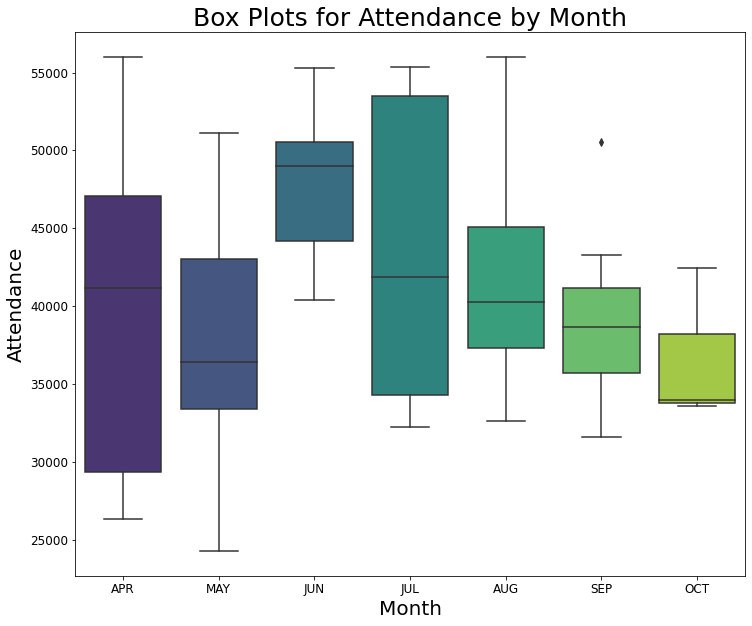

In [11]:
# Box Plots of Attendance by Month
plt.rcParams['figure.figsize'] = [12, 10]
sns.boxplot(data.month, data.attend, palette="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Box Plots for Attendance by Month", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Attendance", fontsize=20)
plt.show()

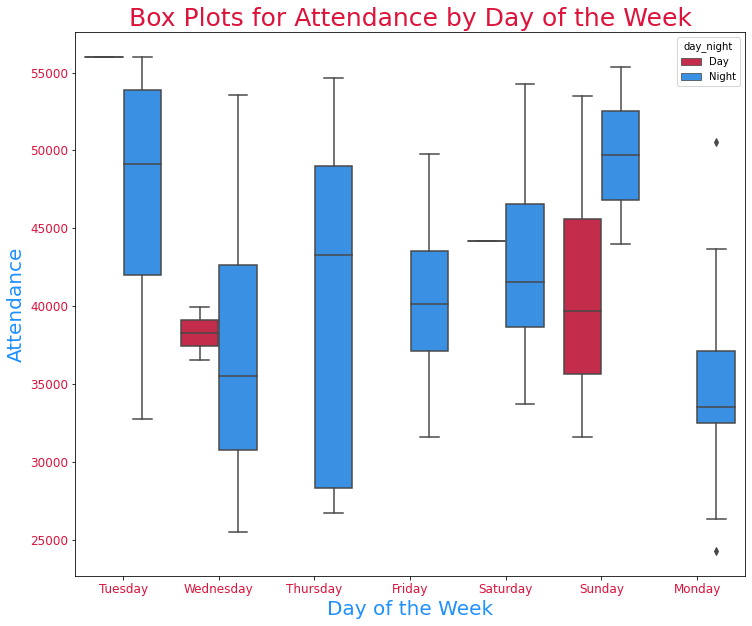

In [12]:
# Box Plots for Attendance by Day of the Week
plt.rcParams['figure.figsize'] = [12, 10]
colors = ('crimson', 'dodgerblue')
sns.boxplot(data.day_of_week, data.attend, hue = data.day_night, palette=colors)
plt.xticks(fontsize=12, color='crimson')
plt.yticks(fontsize=12, color='crimson')
plt.title("Box Plots for Attendance by Day of the Week", fontsize=25, color='crimson')
plt.xlabel("Day of the Week", fontsize=20, color='dodgerblue')
plt.ylabel("Attendance", fontsize=20, color='dodgerblue')
plt.show()

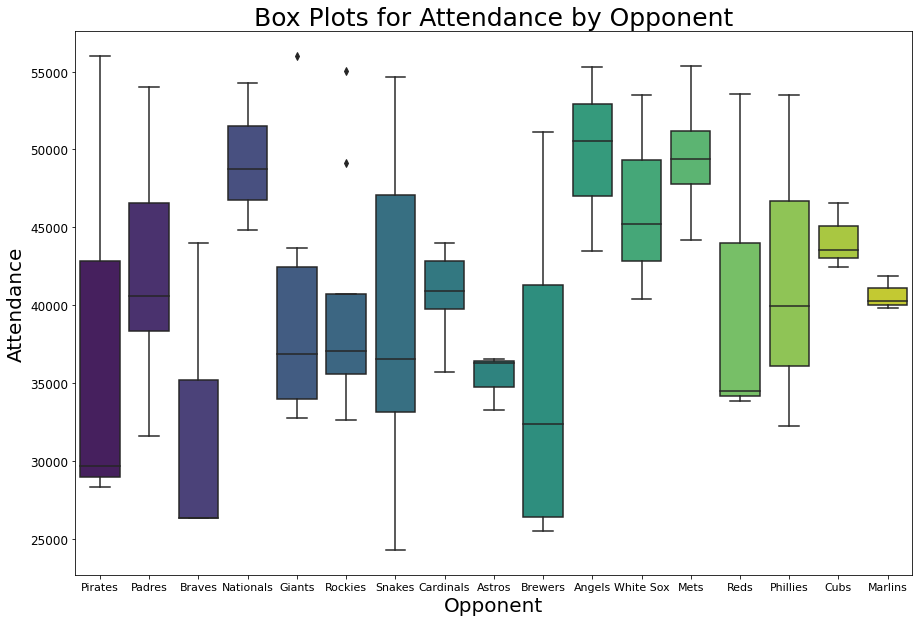

In [13]:
# Box Plots for Attendance by Opponents
plt.rcParams['figure.figsize'] = [15, 10]
sns.boxplot(data.opponent, data.attend, palette='viridis')
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.title('Box Plots for Attendance by Opponent', fontsize=25)
plt.xlabel("Opponent", fontsize=20)
plt.ylabel("Attendance", fontsize=20)
plt.show()

### Summary Statistics of Features for Attendance

In [14]:
# Take a Look at Summary Statistics for Attendance by Month
data.groupby('month').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
OCT,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0
MAY,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
SEP,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0
APR,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
AUG,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
JUL,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
JUN,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0


In [15]:
# Take a Look at Summary Statistics for Attendace by Days of Week
data.groupby('day_of_week').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Monday,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0
Wednesday,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0
Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
Sunday,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
Saturday,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0
Tuesday,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0


In [16]:
# Take a Look at Summary Statistics for Attendace by Opponent
data.groupby('opponent').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
opponent,,,,,,,,
Braves,3.0,32245.000000,10192.264763,26345.0,26360.50,26376.0,35195.00,44014.0
Brewers,4.0,35358.750000,11926.816127,25509.0,26457.00,32394.5,41296.25,51137.0
Astros,3.0,35383.333333,1804.385306,33306.0,34794.50,36283.0,36422.00,36561.0
Pirates,3.0,38019.000000,15587.750672,28328.0,29028.50,29729.0,42864.50,56000.0
Giants,9.0,39296.333333,7463.633599,32799.0,33993.00,36878.0,42473.00,56000.0
Snakes,9.0,39315.444444,10128.392050,24312.0,33180.00,36596.0,47077.00,54621.0
Rockies,9.0,39631.222222,7557.025999,32659.0,35591.00,37084.0,40724.00,55024.0
Reds,3.0,40649.000000,11194.056503,33884.0,34188.50,34493.0,44031.50,53570.0
Marlins,3.0,40665.333333,1101.663439,39805.0,40044.50,40284.0,41095.50,41907.0


In [17]:
# Promotion Summary Statistics for Attendance
data.groupby(['bobblehead','shirt','fireworks','cap']).attend.describe().sort_values('mean')

count          mean          std      min  \
bobblehead shirt fireworks cap                                              
NO         NO    NO        YES    2.0  38189.500000  6088.896493  33884.0   
                           NO    51.0  38201.078431  7437.222312  24312.0   
                 YES       NO    14.0  41077.857143  5768.351782  31601.0   
           YES   NO        NO     3.0  46643.666667  5295.079351  40619.0   
YES        NO    NO        NO    11.0  53144.636364  2887.153279  47077.0   

                                     25%      50%       75%      max  
bobblehead shirt fireworks cap                                        
NO         NO    NO        YES  36036.75  38189.5  40342.25  42495.0  
                           NO   33423.00  37084.0  43401.50  56000.0  
                 YES       NO   37255.25  40299.5  43789.00  53570.0  
           YES   NO        NO   44686.00  48753.0  49656.00  50559.0  
YES        NO    NO        NO   51984.50  54242.0  55151.50  56000.0

### Correlation Analysis

In [18]:
ord_enc = OrdinalEncoder()

datanums = data

# Encoding Month and Day Categories into Numerical Columns
monthsanddays = {"month":     {'APR': 4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10},
                "day_of_week": {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5,
                                 'Friday':6, 'Saturday':7}}
datanums.replace(monthsanddays, inplace=True)

I wanted to be sure that the months and days were numbered correctly so I labeled them separately from the other categorical columns.

In [19]:
# Encoding the Other Categorical Columns using the OrdinalEncoder from SkLearn
datanums['opponent'] = ord_enc.fit_transform(data[['opponent']])
datanums['skies'] = ord_enc.fit_transform(data[['skies']])
datanums['day_night'] = ord_enc.fit_transform(data[['day_night']])
datanums['cap'] = ord_enc.fit_transform(data[['cap']])
datanums['shirt'] = ord_enc.fit_transform(data[['shirt']])
datanums['fireworks'] = ord_enc.fit_transform(data[['fireworks']])
datanums['bobblehead'] = ord_enc.fit_transform(data[['bobblehead']])

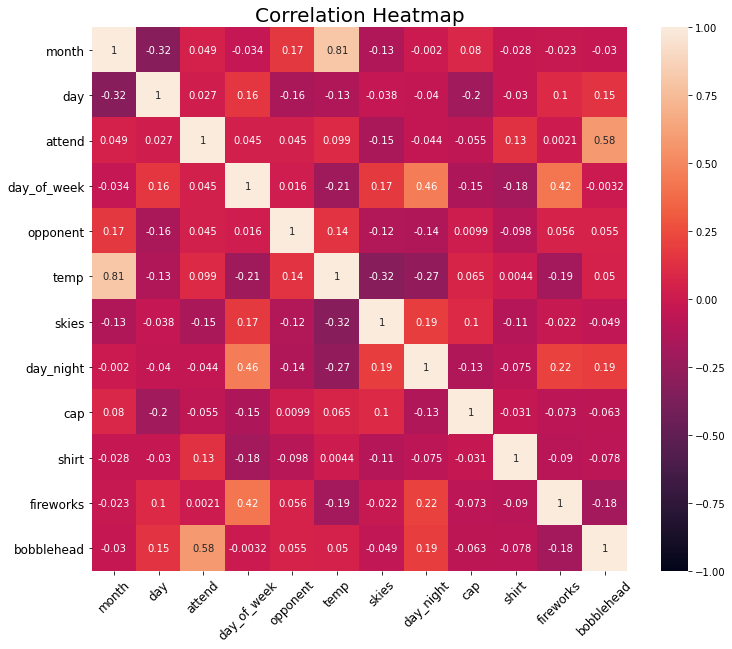

In [20]:
# Create Correlation Heatmap
plt.rcParams['figure.figsize'] = [12, 10]
sns.heatmap(datanums.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Heatmap', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(rotation = 45, fontsize=12)
plt.show()

In [21]:
datanums.to_csv(r'C:\Users\laura\Bellevue\Predictive Analytics\Week3\datanums.csv', index = False, header=True)

## Model Building
### Regression Model

In [22]:
# Setting the Target Variable
X = datanums.drop('attend', axis=1)
# All Other Variables (Predictors)
y = datanums.attend

In [23]:
# Dividing the Data Set into Training and Testing Groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 60
Testing Data Count: 21


In [24]:
# Build the Model
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3.227
Date:                Sun, 27 Jun 2021   Prob (F-statistic):            0.00235
Time:                        14:02:35   Log-Likelihood:                -608.66
No. Observations:                  60   AIC:                             1241.
Df Residuals:                      48   BIC:                             1266.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.043e+04   1.32e+04      3.820      0.000    2.39e+04     7.7e+04
month        1620.6319   1090.943      1.486      0.144    -572.856    3814.120
day           -77.7166    107.261     -0.725      0.472    -293.379     137.945
day_of_week   907.1141    600.629      1.510      0.138    -300.531    2114.759
opponent     -125.6215    197.432     -0.636      0.528    -522.586     271.343
temp         -257.1608    244.989     -1.050      0.299    -749.745     235.423
skies       -2186.2683   2452.304     -0.892      0.377   -7116.956    2744.419
day_night   -6972.8682   2966.662     -2.350      0.023   -1.29e+04   -1007.994
cap          -516.9942   5192.859     -0.100      0.921    -1.1e+04    9923.948
shirt        9576.5645   4274.409      2.240      0.030     982.288    1.82e+04
fireworks    3432.5156   3030.482      1.133      0.263   -2660.677    9525.708
bobblehead   1.874e+04   3351.057      5.592      0.000     1.2e+04    2.55e+04
==============================================================================
Omnibus:                        4.605   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.167
Skew:                           0.645   Prob(JB):                        0.124
Kurtosis:                       3.018   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is showing us how much variance is explained by the model and is a small number in this case, because only about 49% of the variance can be explained.

In [25]:
# Predicting y_value using traning data of X
y_train_pred = results.predict(X_train)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

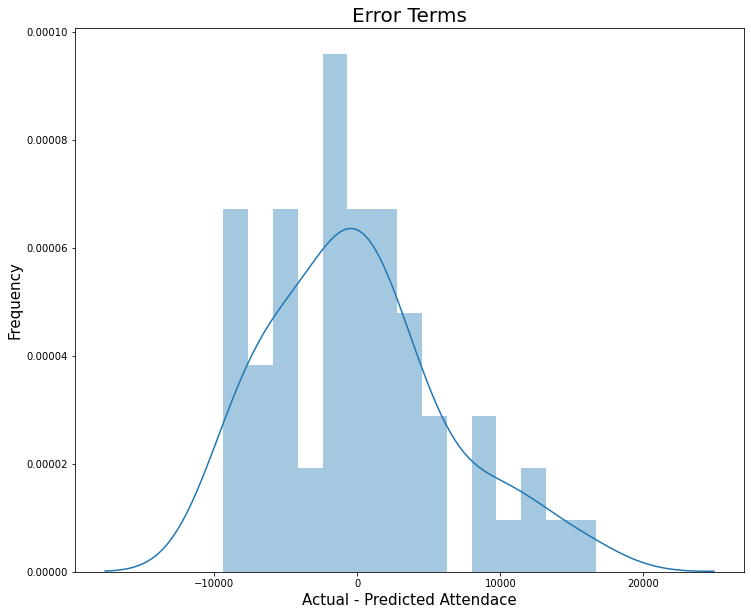

In [26]:
# Plotting a Histogram of Predicted vs. Actual Attendance Differences
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Actual - Predicted Attendace', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

With the results from the model we can see that the bobblehead promotion has the most statistical significance in terms of attendance so bobbleheads should be the promotion chosen to increase attendance. We can see using this last graph that the model can be off in its predictions, but has a higher frequency of predicting values closer to the actual attendance rather than far off. 